# Ranking analysis

Recently my alma-mater, EPFL, has been ranked as the best new university. Following that article I decided to anaylise university rankings and see how EPFL evolved in the ranking and what are the main criteria that influenced it's rise. Also I will analyse which criteria they can improve and which ranking they could expect in the future.

We will use the data provided by Kaggle for the analysis: https://www.kaggle.com/mylesoneill/world-university-rankings

## Times Higher Education

Let's check the evolution of EPFL in the Times Education Ranking.


In [3]:
# Import the good stuff
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Read the times data csv from Kaggle
times_df = pd.read_csv('./timesData.csv')

# Only EPFL rankings
times_epfl_df = times_df[times_df['university_name'] == ('École Polytechnique Fédérale de Lausanne')] 

# Preview of dataset
times_epfl_df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
47,48,École Polytechnique Fédérale de Lausanne,Switzerland,55.0,100.0,56.1,83.8,38.0,66.5,"9,666",10.5,54%,27 : 73,2011
245,46,École Polytechnique Fédérale de Lausanne,Switzerland,53.1,98.9,43.9,95.3,46.7,66.3,"9,666",10.5,54%,27 : 73,2012
641,40,École Polytechnique Fédérale de Lausanne,Switzerland,62.4,98.8,57.0,95.0,49.8,73.0,"9,666",10.5,54%,27 : 73,2013
1038,37,École Polytechnique Fédérale de Lausanne,Switzerland,52.9,98.2,48.3,95.9,49.2,67.7,"9,666",10.5,54%,27 : 73,2014
1436,34,École Polytechnique Fédérale de Lausanne,Switzerland,54.7,98.8,56.9,95.0,61.9,70.9,"9,666",10.5,54%,27 : 73,2015


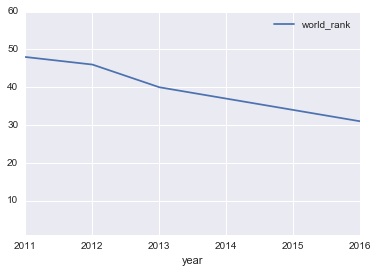

In [6]:
# Convert data to int and floats
times_epfl_df['world_rank'] = times_epfl_df['world_rank'].astype('int64')
times_epfl_df['international'] = times_epfl_df['international'].astype('float64')
times_epfl_df['income'] = times_epfl_df['income'].astype('float64')
times_epfl_df['total_score'] = times_epfl_df['total_score'].astype('float64')

# Plot evolution of ranking
ax = times_epfl_df.plot(
    kind='line', 
    x='year', 
    y='world_rank',
    xlim=(2011, 2016), 
    ylim=(1, 60), 
    xticks=range(2011, 2017)
)

# Have ints for the labels
ax.ticklabel_format(useOffset=False, style='plain')

,total_score,world_rank,year
245,-0.003008,-0.041667,2012
641,0.101056,-0.130435,2013
1038,-0.072603,-0.075000,2014
1436,0.047267,-0.081081,2015
1833,0.073343,-0.088235,2016


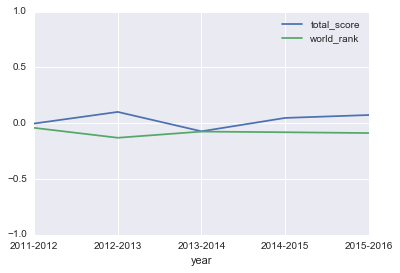

In [8]:
# Position vs total_score, let's check the relationship of the ranking vs the total score
compare_df = times_epfl_df[['total_score', 'world_rank']]

percent_df = compare_df.pct_change()
percent_df = percent_df.dropna()
percent_df['year'] = times_epfl_df['year']

# It should be symetrical on the x axis, if the score goes up, the ranking goes down.
ax = percent_df.plot(
    kind='line', 
    x='year', 
    xticks=range(2012, 2017),# hacky
    ylim=(-1, 1), 
)

ax.set_xticklabels(['2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016'])

percent_df

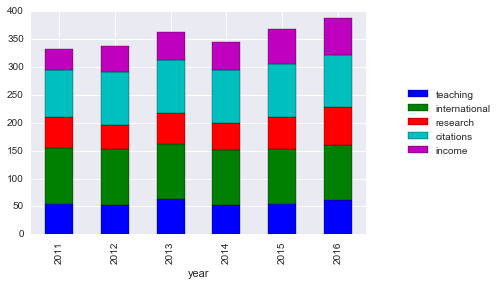

In [7]:
# Plot evolution of each criteria of the ranking
bar_criteria_df = times_epfl_df[['year', 'teaching', 'international', 'research', 'citations', 'income']]
ax = bar_criteria_df.plot.bar(
    stacked=True,
    x='year'
)

ax.legend(loc=7, bbox_to_anchor=(1.4, 0.5)) # Tweaking until it looks nice, hacky

In [49]:
times_epfl_df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
47,48,École Polytechnique Fédérale de Lausanne,Switzerland,55.0,100.0,56.1,83.8,38.0,66.5,"9,666",10.5,54%,27 : 73,2011
245,46,École Polytechnique Fédérale de Lausanne,Switzerland,53.1,98.9,43.9,95.3,46.7,66.3,"9,666",10.5,54%,27 : 73,2012
641,40,École Polytechnique Fédérale de Lausanne,Switzerland,62.4,98.8,57.0,95.0,49.8,73.0,"9,666",10.5,54%,27 : 73,2013
1038,37,École Polytechnique Fédérale de Lausanne,Switzerland,52.9,98.2,48.3,95.9,49.2,67.7,"9,666",10.5,54%,27 : 73,2014
1436,34,École Polytechnique Fédérale de Lausanne,Switzerland,54.7,98.8,56.9,95.0,61.9,70.9,"9,666",10.5,54%,27 : 73,2015
1833,31,École Polytechnique Fédérale de Lausanne,Switzerland,61.3,98.6,67.5,94.6,65.4,76.1,"9,666",10.5,54%,27 : 73,2016
